In [1]:
import matplotlib.pyplot as plt
import numpy as np
from contpy import frequency

#Target function 
coef = np.array([[10,0],
                 [0,3],
                 [0,1]])

freq_list = [1.0,3.0,5.0]

def func(t):
    fval = 0
    for i,f in enumerate(freq_list):
        fval += np.sum(coef[i].dot([np.cos(2.0*np.pi*f*t),np.sin(2.0*np.pi*f*t)]))
    return fval

In [2]:
ndofs = 2
nH = 6 # number of harmonics to be considererd
n_points = 10000 # number of points to be considered

time_list = np.linspace(0,1,n_points)
f_list = np.array(list(map(func,time_list)))
f_desired = np.array([f_list]*ndofs)

Q = frequency.assemble_hbm_operator(ndofs,number_of_harm=nH ,n_points=n_points) # bases of truncaded Fourier

f_actual = Q.dot(Q.H.dot(f_desired))

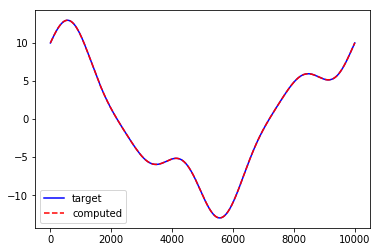

In [3]:
plt.plot(f_list,'b',label='target')
plt.plot(f_actual[0],'r--',label='computed')
plt.legend()
plt.show()

In [4]:
ndofs = 2
nH = 2 # number of harmonics to be considererd
n_points = 1000 # number of points to be considered


time_list = np.linspace(0,1,n_points)
f_list = np.array(list(map(func,time_list)))
f_desired = np.array([f_list]*ndofs)

Q = frequency.assemble_hbm_operator(ndofs,number_of_harm=nH ,n_points=n_points) # bases of truncaded Fourier

f_actual = Q.dot(Q.H.dot(f_desired))

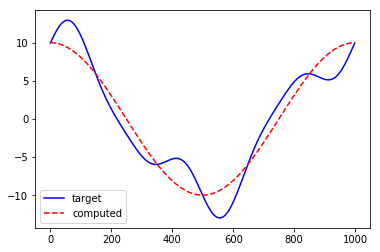

In [5]:
plt.plot(f_list,'b',label='target')
plt.plot(f_actual[0],'r--',label='computed')
plt.legend()
plt.show()